In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt("c++/dati.csv", delimiter=" ")

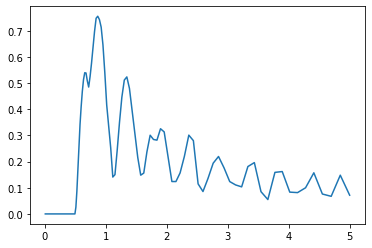

In [7]:
plt.plot(data[:,0], data[:,1])